<a href="https://colab.research.google.com/github/AkinyemiGbenga/CODSOFT/blob/main/Movie_Rating_Prediction_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk
import re
import csv
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the movie dataset with a different encoding
movies_data = pd.read_csv('IMDb_Movies_India.csv', encoding='latin-1')  # or encoding='ISO-8859-1'


In [3]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movies_data.shape

(15509, 10)

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
# check for missing values
movies_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
movies_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [8]:
# replacing the missing values in the 'Year' column with the year that has most movies produced(mode) value of the Year
movies_data['Year'].fillna(movies_data['Year'].mode()[0], inplace=True)

In [9]:
# replacing the missing values in the 'Duration' column with the most frequent duration (mode) in the column
movies_data['Duration'].fillna(movies_data['Duration'].mode()[0], inplace=True)

In [10]:
# replacing the missing values in the 'Genre' column with the most frequent Genre (mode) in the column
movies_data['Genre'].fillna(movies_data['Genre'].mode()[0], inplace=True)

In [11]:
# replacing the missing values in the 'Rating' column with the average Rating (mean)
movies_data['Rating'].fillna(movies_data['Rating'].mean(), inplace=True)

In [12]:
# replacing the missing values in the 'Votes' column with the most number of Votes
movies_data['Votes'].fillna(movies_data['Votes'].mode()[0], inplace=True)

In [13]:
# replacing the missing values in the 'Director' column with the most mentioned Director in the column
movies_data['Director'].fillna(movies_data['Director'].mode()[0], inplace=True)

In [14]:
# replacing the missing values in the 'Actor 1' column with the most mentioned Actor 1 in the column
movies_data['Actor 1'].fillna(movies_data['Director'].mode()[0], inplace=True)

In [15]:
# replacing the missing values in the 'Actor 2' column with the most mentioned Actor 2 in the column
movies_data['Actor 2'].fillna(movies_data['Actor 2'].mode()[0], inplace=True)

In [16]:
# replacing the missing values in the 'Actor 3' column with the most mentioned Actor 3 in the column
movies_data['Actor 3'].fillna(movies_data['Actor 3'].mode()[0], inplace=True)

In [17]:
# check for missing values
movies_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
movies_data['Actor 1'].value_counts()

Jayant Desai            1617
Ashok Kumar              158
Jeetendra                140
Dharmendra               140
Mithun Chakraborty       133
                        ... 
Abhinav Kumar              1
Shibani Bhattacharya       1
Kavita Kapoor              1
Awdhesh Mishra             1
Sangeeta Tiwari            1
Name: Actor 1, Length: 4719, dtype: int64

In [19]:
movies_data['Actor 1'].unique()

array(['Manmauji', 'Rasika Dugal', 'Sayani Gupta', ..., 'Meghan Jadhav',
       'Roohi Berde', 'Sangeeta Tiwari'], dtype=object)

In [20]:
movies_data['Actor 1'].value_counts().head(10)

Jayant Desai          1617
Ashok Kumar            158
Jeetendra              140
Dharmendra             140
Mithun Chakraborty     133
Amitabh Bachchan       129
Rajesh Khanna          122
Dev Anand               93
Shashi Kapoor           91
Akshay Kumar            88
Name: Actor 1, dtype: int64

In [21]:
movies_data['Actor 2'].value_counts()

Rekha                 2467
Hema Malini             72
Mithun Chakraborty      63
Dharmendra              61
Helen                   48
                      ... 
Paris Keswani            1
Shubhangi Latkar         1
Amit Ghosh               1
Ayushi Singh             1
Sarah Jane Dias          1
Name: Actor 2, Length: 4891, dtype: int64

In [22]:
movies_data['Actor 2'].unique()

array(['Birbal', 'Vivek Ghamande', 'Plabita Borthakur', ...,
       'Devan Sanjeev', 'Prince Daniel', 'Sarah Jane Dias'], dtype=object)

In [23]:
movies_data['Actor 3'].value_counts()

Pran             3235
Shakti Kapoor      65
Anupam Kher        64
Jeevan             59
Prem Chopra        52
                 ... 
Kayamali            1
Kirit Shah          1
Sanil Khosla        1
Anup Grover         1
Suparna Anand       1
Name: Actor 3, Length: 4820, dtype: int64

In [24]:
movies_data['Actor 3'].unique()

array(['Rajendra Bhatia', 'Arvind Jangid', 'Roy Angana', ...,
       'Shatakshi Gupta', 'Valerie Agha', 'Suparna Anand'], dtype=object)

In [25]:
movies_data['Rating'].value_counts()

5.841621     7590
6.200000      269
6.800000      264
6.500000      254
6.600000      239
             ... 
9.700000        1
1.400000        1
10.000000       1
9.600000        1
1.100000        1
Name: Rating, Length: 85, dtype: int64

In [26]:
movies_data['Rating'].unique()

array([ 5.84162142,  7.        ,  4.4       ,  4.7       ,  7.4       ,
        5.6       ,  4.        ,  6.2       ,  5.9       ,  6.5       ,
        5.7       ,  6.3       ,  7.2       ,  6.6       ,  7.3       ,
        7.1       ,  6.9       ,  3.5       ,  5.        ,  4.5       ,
        6.4       ,  4.1       ,  4.8       ,  8.1       ,  5.5       ,
        6.8       ,  6.1       ,  7.7       ,  5.1       ,  7.6       ,
        3.1       ,  3.3       ,  7.8       ,  8.4       ,  5.2       ,
        4.3       ,  5.8       ,  4.6       ,  7.5       ,  6.7       ,
        3.6       ,  3.9       ,  5.4       ,  4.2       ,  5.3       ,
        3.4       ,  3.        ,  8.        ,  6.        ,  3.8       ,
        7.9       ,  2.7       ,  4.9       ,  2.4       ,  3.7       ,
        3.2       ,  2.5       ,  2.8       ,  2.6       ,  2.9       ,
        8.2       ,  8.7       ,  8.3       ,  9.3       ,  8.8       ,
        2.1       ,  2.3       ,  8.5       ,  8.6       ,  9.  

Text(0, 0.5, 'Frequency')

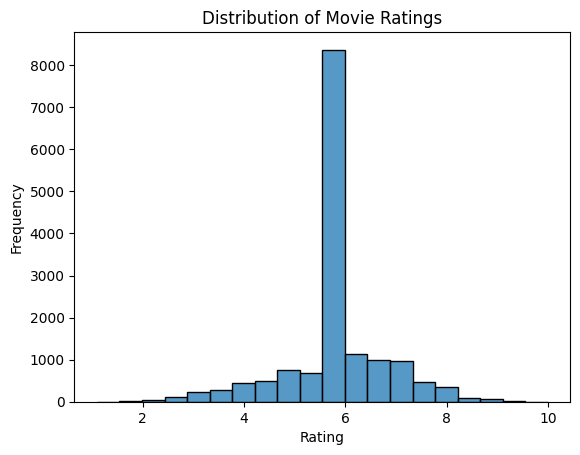

In [27]:
sns.histplot(movies_data['Rating'], bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [28]:
movies_data['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [29]:
movies_data['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', 'Comedy, Drama, Fantasy', 'Comedy, Drama, Family',
       'Crime, Drama, Mystery', 'Horror, Thriller', 'Biography',
       'Comedy, Horror', 'Action', 'Drama, Horror, Mystery', 'Comedy',
       'Action, Thriller', 'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime

In [30]:
movies_data['Genre'].value_counts().head(20)


Drama                      4657
Action                     1289
Thriller                    779
Romance                     708
Drama, Romance              524
Comedy                      495
Action, Crime, Drama        455
Drama, Family               418
Horror                      322
Action, Drama               316
Documentary                 283
Comedy, Drama               264
Comedy, Drama, Romance      224
Fantasy                     170
Action, Comedy, Drama       149
Action, Thriller            142
Comedy, Romance             140
Action, Drama, Romance      134
Family                      112
Drama, Musical, Romance     108
Name: Genre, dtype: int64

In [31]:
# Using value_counts() to get unique values and their counts
value_counts = movies_data['Genre'].value_counts()
print("Unique Values and Counts:\n", value_counts)

Unique Values and Counts:
 Drama                         4657
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64


In [32]:
all_genres = []
for genres_str in movies_data['Genre']:
    genres_list = genres_str.split(',')
    all_genres.extend(genres_list)

unique_genres = set(all_genres)
print("Number of unique genres:", len(unique_genres))

Number of unique genres: 43


In [33]:
all_genres = nltk.FreqDist(all_genres)

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})

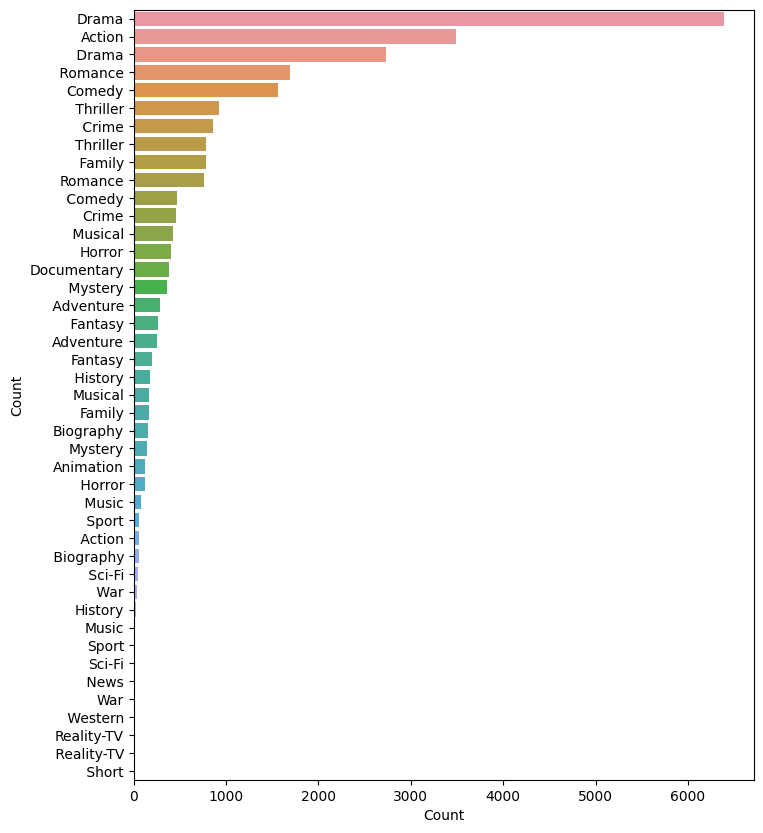

In [34]:
genres = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(8,10))
ax = sns.barplot(data=genres, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

In [35]:
# Using group by to get the average ratings of the movies based on their genre
grouped_data = movies_data.groupby('Genre')

# Get the count of movies in each genre
genre_counts = grouped_data.size().reset_index(name='movie_count')

# Get the average rating for each genre
average_rating = grouped_data['Rating'].mean().reset_index(name='average_rating')

# Merge the results into a new DataFrame
genre_stats = pd.merge(genre_counts, average_rating, on='Genre')

# Display the resulting DataFrame
print(genre_stats)


                            Genre  movie_count  average_rating
0                          Action         1289        5.599297
1               Action, Adventure           41        5.675794
2    Action, Adventure, Biography            1        7.800000
3       Action, Adventure, Comedy           42        5.621030
4        Action, Adventure, Crime           19        5.601309
..                            ...          ...             ...
480              Thriller, Action            2        5.070811
481    Thriller, Musical, Mystery            1        7.100000
482             Thriller, Mystery            3        6.533333
483     Thriller, Mystery, Family            1        6.100000
484                           War            8        5.276013

[485 rows x 3 columns]


In [36]:
movies_data['Name'].unique

<bound method Series.unique of 0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object>

In [37]:
movies_data['Name'].value_counts().head(10)

Anjaam         7
Mamta          7
Zindagi        6
Musafir        6
Albela         5
Toofan         5
Guru           5
Amar Prem      5
Laila Majnu    5
Shararat       5
Name: Name, dtype: int64

In [38]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Duration  15509 non-null  object 
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  object 
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [39]:
movies_data['Votes'].value_counts().head(10)

8     7816
7      224
9      221
6      213
10     175
5      164
11     157
13     145
12     136
15     130
Name: Votes, dtype: int64

Non-numeric 'Votes' values: 6       NaN
15      NaN
28      NaN
30      NaN
33      NaN
         ..
15437   NaN
15440   NaN
15447   NaN
15476   NaN
15494   NaN
Name: Votes, Length: 1372, dtype: float64


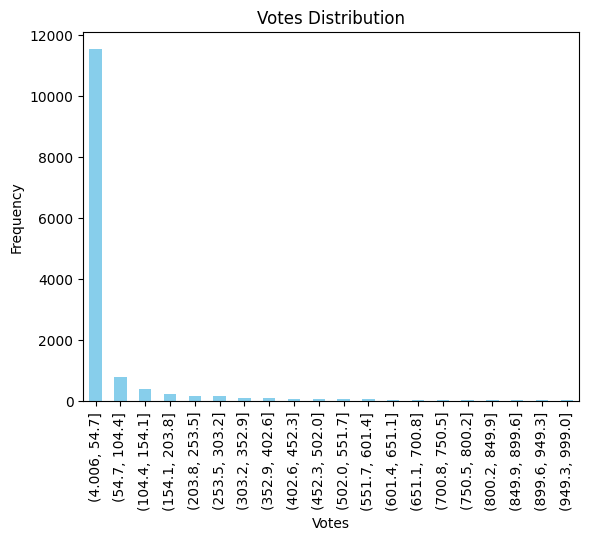

In [40]:
# Convert 'Votes' column to numeric (assuming it's initially in string format)
movies_data['Votes'] = pd.to_numeric(movies_data['Votes'], errors='coerce')

# Check for any non-numeric values
non_numeric_votes = movies_data['Votes'].loc[~movies_data['Votes'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Non-numeric 'Votes' values:", non_numeric_votes)

# Drop any rows with non-numeric 'Votes' values
movies_data = movies_data.drop(non_numeric_votes.index)

# Apply pd.cut after ensuring 'Votes' is numeric
votes_bins = pd.cut(movies_data['Votes'], bins=20)
votes_counts = votes_bins.value_counts().sort_index()

# Create a bar plot
votes_counts.plot(kind='bar', color='skyblue')

plt.title('Votes Distribution')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()


In [41]:
# Assuming 'Votes' and 'Rating' are the columns you want to convert
movies_data['Votes'] = movies_data['Votes'].astype(int)
movies_data['Rating'] = movies_data['Rating'].astype(int)


In [42]:
movies_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [43]:
# using group by to get information about the columns
actor1 = movies_data.groupby('Actor 1')
actor2 = movies_data.groupby('Actor 2')
actor3 = movies_data.groupby('Actor 3')
directors = movies_data.groupby('Director')
ratings = movies_data.groupby('Rating')
ratings.first()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,,,,,,,,,
1,Chatur Singh Two Star,(2011),150 min,"Action, Adventure, Comedy",624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher
2,Aa Gaya Hero,(2017),123 min,Action,339,Dipankar Senapati,Govinda,Richa Sharma,Poonam Pandey
3,18.11,(2014),126 min,Action,10,Mohibul Haque,Rehal Khan,Gulshan Grover,Mukesh Tiwari
4,#Yaaram,(2019),110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,,(2019),120 min,Drama,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
6,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
7,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
8,A Billion Colour Story,(2016),105 min,Drama,412,Padmakumar Narasimhamurthy,Dhruva Padmakumar,Gaurav Sharma,Vasuki
9,Ashok Vatika,(2018),97 min,Drama,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


In [44]:
# getting info about Actor 1
Actor_1 = actor1.get_group('Mimoh Chakraborty')
Actor_1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5624,He - The Only One,(2010),120 min,Action,5,8,Tejas Dhhanraj,Mimoh Chakraborty,Mithun Chakraborty,Neena Gupta
6209,Ishqedarriyaan,(2015),132 min,Romance,4,151,V.K. Prakash,Mimoh Chakraborty,Kavin Dave,Mohit Dutta
6744,Jimmy,(2008),120 min,"Action, Crime, Drama",1,249,Raj N. Sippy,Mimoh Chakraborty,Vikas Anand,Rahul Dev
14183,The Murderer: Hamilton Palace,(2011),108 min,"Action, Mystery",4,10,Raj N. Sippy,Mimoh Chakraborty,Milind Gunaji,Shakti Kapoor
14499,Tukkaa Fitt,(2018),120 min,Drama,6,13,Shawn Arranha,Mimoh Chakraborty,Kurush Deboo,Vaishali Desai


<Axes: xlabel='Actor 1', ylabel='Ratings'>

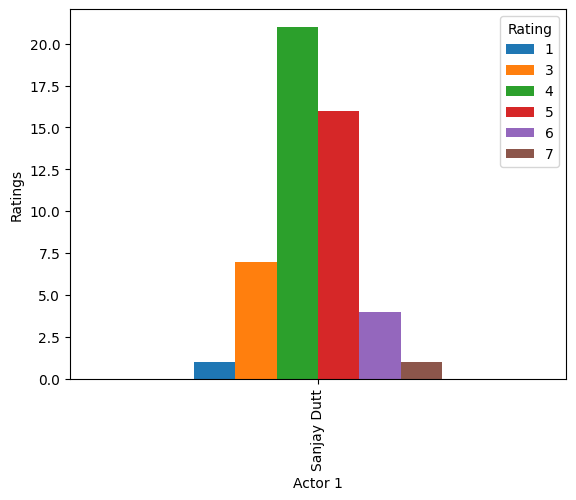

In [45]:
Actor1_Ratings = movies_data[movies_data['Actor 1'].str.contains('Sanjay Dutt')==True]
Actor1_Ratings.groupby(['Actor 1', 'Rating']).size().unstack().plot(kind = 'bar', stacked = False, xlabel = 'Actor 1', ylabel = 'Ratings')

<Axes: xlabel='Actor 2', ylabel='Ratings'>

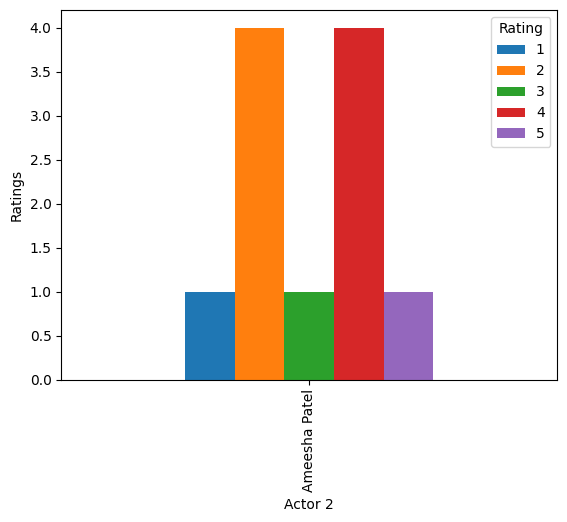

In [46]:
Actor2_Ratings = movies_data[movies_data['Actor 2'].str.contains('Ameesha Patel')==True]
Actor2_Ratings.groupby(['Actor 2', 'Rating']).size().unstack().plot(kind = 'bar', stacked = False, xlabel = 'Actor 2', ylabel = 'Ratings')

<Axes: xlabel='Actor 3', ylabel='Ratings'>

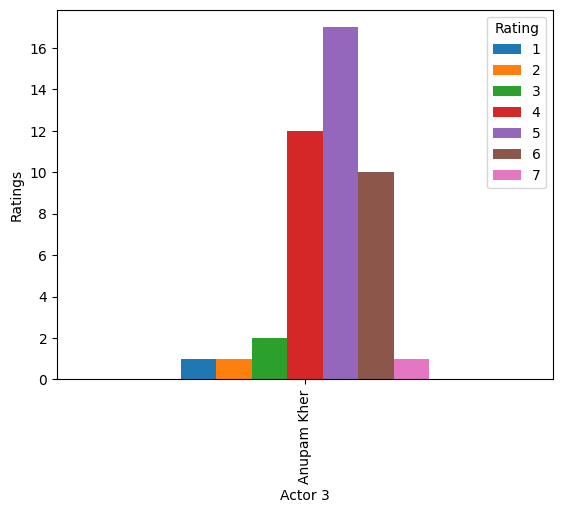

In [47]:
Actor3_Ratings = movies_data[movies_data['Actor 3'].str.contains('Anupam Kher')==True]
Actor3_Ratings.groupby(['Actor 3', 'Rating']).size().unstack().plot(kind = 'bar', stacked = False, xlabel = 'Actor 3', ylabel = 'Ratings')

<Axes: xlabel='Director', ylabel='Ratings'>

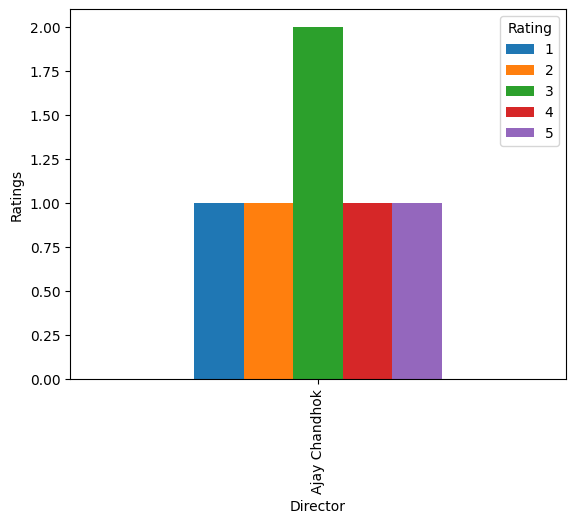

In [48]:
Director_Ratings = movies_data[movies_data['Director'].str.contains('Ajay Chandhok')==True]
Director_Ratings.groupby(['Director', 'Rating']).size().unstack().plot(kind = 'bar', stacked = False, xlabel = 'Director', ylabel = 'Ratings')

Separate the columns containing the Feature variables and Target variables

In [49]:
# Split data into features and target variable
X = movies_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
Y = movies_data['Rating']

In [50]:
# viewing the independent variable
print(X)

                 Genre            Director           Actor 1  \
0                Drama       J.S. Randhawa          Manmauji   
1                Drama       Gaurav Bakshi      Rasika Dugal   
2       Drama, Musical  Soumyajit Majumdar      Sayani Gupta   
3      Comedy, Romance          Ovais Khan           Prateik   
4                Drama        Amol Palekar      Rajat Kapoor   
...                ...                 ...               ...   
15504           Action       Mahendra Shah  Naseeruddin Shah   
15505    Action, Drama          Kuku Kohli      Akshay Kumar   
15506           Action          Kiran Thej   Sangeeta Tiwari   
15507           Action        Jayant Desai      Jayant Desai   
15508    Action, Drama        K.C. Bokadia        Dharmendra   

                  Actor 2          Actor 3  Votes  
0                  Birbal  Rajendra Bhatia      8  
1          Vivek Ghamande    Arvind Jangid      8  
2       Plabita Borthakur       Roy Angana      8  
3              Ishita R

In [51]:
# Viewing the target variable
print(Y)

0        5
1        7
2        5
3        4
4        5
        ..
15504    4
15505    4
15506    5
15507    5
15508    6
Name: Rating, Length: 14137, dtype: int64


Splitting the data into train data and test data

In [52]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)


In [54]:
print(X.shape, X_train.shape, X_test.shape)

(14137, 6) (11309, 6) (2828, 6)


In [55]:
Y_train = X_train.dropna()
Y_train = Y_train.loc[X_train.index]


In [56]:
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in Y_train:", Y_train.shape[0])


Number of samples in X_train: 11309
Number of samples in Y_train: 11309


In [57]:
# # Ensure both training and test sets have the same categories in 'genre'
# common_genres = set(X_train['Genre']).intersection(X_test['Genre'])
# X_train = X_train[X_train['Genre'].isin(common_genres)]
# X_test = X_test[X_test['Genre'].isin(common_genres)]



In [58]:
# Reset indices to ensure alignment
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

# Now, both X_train and y_train have the same indices


In [59]:
# Reset indices to ensure alignment for testing set
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [60]:
print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in Y_test:", Y_test.shape[0])


Number of samples in X_test: 2828
Number of samples in Y_test: 2828


In [61]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (11309, 6)
Y_train shape: (11309, 6)
X_test shape: (2828, 6)
Y_test shape: (2828,)


Training the Model

Using Linear Regression

In [62]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ])

In [63]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


In [64]:
# Combine training and testing sets
combined_X = pd.concat([X_train, X_test], axis=0)


In [65]:
# Create an instance of OneHotEncoder with handle_unknown='ignore'
onehot_encoder = OneHotEncoder(handle_unknown='ignore')


In [66]:
# Combine training and testing sets
combined_X = pd.concat([X_train, X_test], axis=0)

In [67]:
# Assuming combined_X is your DataFrame and 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3' are the categorical columns
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
combined_X['Genre'] = label_encoder.fit_transform(combined_X['Genre'])
combined_X['Director'] = label_encoder.fit_transform(combined_X['Director'])
combined_X['Actor 1'] = label_encoder.fit_transform(combined_X['Actor 1'])
combined_X['Actor 2'] = label_encoder.fit_transform(combined_X['Actor 2'])
combined_X['Actor 3'] = label_encoder.fit_transform(combined_X['Actor 3'])

In [68]:
# Reset indices to ensure alignment
X_train_encoded = combined_X.iloc[:len(X_train), :].reset_index(drop=True)
X_test_encoded = combined_X.iloc[len(X_train):, :].reset_index(drop=True)



In [70]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("Y_train_encoded shape:", Y_train_encoded.shape)


X_train_encoded shape: (11309, 6)
Y_train_encoded shape: (6, 16)


In [71]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [74]:

# Assuming you have features X_train and labels Y_train

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:

# Example: One-hot encoding for categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [76]:
# Example: Label encoding for categorical labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [77]:
# Print the shapes to check for consistency
print("X_train_encoded shape:", X_train_encoded.shape)
print("Y_train_encoded shape:", Y_train_encoded.shape)

X_train_encoded shape: (11309, 17794)
Y_train_encoded shape: (11309,)


In [80]:
# Example: One-hot encoding for categorical features
encoder = OneHotEncoder()
X_train_encoded_sparse = encoder.fit_transform(X_train)

In [81]:
# Convert the sparse matrix to a Pandas DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded_sparse.toarray(), columns=encoder.get_feature_names_out(X_train.columns))

In [82]:
# Example: Label encoding for categorical labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [84]:
print(X_train.columns)


Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], dtype='object')


In [87]:
categorical_columns = ['Genre']  # Add other categorical columns if needed
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error', categories='auto')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
# Example: Label encoding for categorical labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)


In [89]:
# Print the shapes to check for consistency
print("X_train_encoded shape:", X_train_encoded.shape)
print("Y_train_encoded shape:", Y_train_encoded.shape)


X_train_encoded shape: (11309, 418)
Y_train_encoded shape: (11309,)


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming you have features X_train and labels Y_train

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify categorical columns for one-hot encoding
categorical_columns = ['Genre']  # Adjust as needed

# Label encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

# One-hot encode categorical columns using pd.get_dummies()
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Example: Label encoding for categorical labels
label_encoder_y = LabelEncoder()
Y_train_encoded = label_encoder_y.fit_transform(Y_train)

# Print the shapes to check for consistency
print("X_train_encoded shape:", X_train_encoded.shape)
print("Y_train_encoded shape:", Y_train_encoded.shape)

# Ensure the shapes are aligned
if X_train_encoded.shape[0] != Y_train_encoded.shape[0]:
    # Perform necessary data adjustments (e.g., rechecking encoding or data splitting)
    # ...

    # Example: If you want to print a message or perform some action
    print("Shapes are not aligned. Adjust your data preprocessing steps.")

# Train the model
model = RandomForestRegressor()
model.fit(X_train_encoded, Y_train_encoded)


X_train_encoded shape: (11309, 423)
Y_train_encoded shape: (11309,)


ValueError: ignored